# Creating a Credit Scoring Model for a Banking Institution Using Machine Learning
---

## Introduction
- This project aims to develop a credit scoring model for a banking institution using machine learning techniques. The model will use a dataset obtained from the UCI Machine Learning Repository, specifically the "Default of Credit Card Clients" dataset. Credit scoring plays a crucial role in assessing the creditworthiness of individuals, helping financial institutions make informed decisions about granting credit and managing risk.

## Problem
- The problem addressed in this research is the prediction of customers' default payments status that can help a bank automate this process and avoid alot of manual work. The objective is to build a model that accurately predicts the probability of default status, which is more valuable from a risk management perspective and help decide customer's classification into credible or non-credible clients. By employing various data mining methods and comparing their predictive accuracy, we aim to identify the most effective approach for estimating the probability of default.

## Solution
- The proposed solution utilizes machine learning techniques to develop a credit scoring model that can accurately predict the probability of default. By leveraging the dataset and implementing advanced algorithms, we aim to create a robust model capable of assessing credit risk effectively. The model will take into account various factors such as the amount of credit, gender, education, marital status, age, and the history of past payment, among others, to provide an accurate assessment of creditworthiness.

## Dataset Information
- The dataset used in this research contains information on customers' default payments in Taiwan1. It can be downloaded from the link  http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients. It comprises 23 variables, including the amount of credit given, gender, education, marital status, age, and the history of past payment from April to September 2005. Additionally, the dataset includes the amount of bill statements and previous payments made during the same period.





```

Note: Data is based on the work of I-Cheng Yeh and Chun-Hao Lien2.
    Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.


```

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



# for modellings.
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, GroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# for evaluation
from sklearn.metrics import (
    accuracy_score, 
    recall_score, 
    precision_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix, 
    roc_curve, auc
)

In [2]:
# read the dataset
df = pd.read_excel("./default of credit card clients.xls")

In [3]:
# check the dataset sample
df.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [4]:
# drop the unamed column
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1


In [6]:
# the first row should be used as the column
DATA_COLUMNS  = df.iloc[0, :].tolist()

In [7]:
# drop the first row and then ranme the columns
df = df.iloc[1:, :]

In [8]:
# rename the columns
df.columns = DATA_COLUMNS

In [9]:
# recheck the dataset
df.head(4)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [10]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

### Observation.

- From the above, there are 30k customers records where each has about 24 records(features) are described below...
    1. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
    2. SEX: Gender (1 = male, 2 = female)
    3. EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)
    4. MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)
    5. AGE: Age in years
        - Scale for PAY_0 to PAY_6: (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)
    6. PAY_0: Repayment status in September, 2005 (scale same as above)
    7. PAY_2: Repayment status in August, 2005 (scale same as above)
    8. PAY_3: Repayment status in July, 2005 (scale same as above)
    9. PAY_4: Repayment status in June, 2005 (scale same as above)
    10. PAY_5: Repayment status in May, 2005 (scale same as above)
    11. PAY_6: Repayment status in April, 2005 (scale same as above)
    12. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    13. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    14. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    15. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    16. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    17. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    18. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    19. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    20. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    21. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    22. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    23. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    24. default.payment.next.month: Default payment (1=yes, 0=no)
    
- Aside from the above, ID column was ealier dropped as it only used to identify the customer whos record was created.
- Also the columns seems to be objects most of them meaning they are not in the format that they need to be. Some columns should be float which other columns/.
- At first I will convert the data into their required data types as follows.

In [11]:
# lets convert all the columns into numerical values
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

In [12]:
# recheck the data types
data_types = df.dtypes
print(data_types)

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


- I have to rename the target column name from `default payment next month to label`

In [13]:
df = df.rename(columns={"default payment next month":"label"})

- All the features are now in the correct format. 
- Now everything about the data we have and can use the data to be able to use the transaction history of the past 6 months to check whther a customer will default the credit given or not..

- We begin by observing the nulls present in the dataset..

In [14]:
# check nulls present
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
label        0
dtype: int64

- The dataset is  seem to not have any missing values.

In [15]:
# check some summary stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


### Exploratory Data Analysis

- I will perfom some EDA on both multivariate and univariate analysis to gain some insights from the dataset.
-  create a column called defaulter that contain the actual string on whether someone is a defaulter or not

In [16]:
# add is defaulter column
df['defaulter'] = df['label'].map({1:"Defaulter", 0:"Not Defaulter"})

#### 1. Dependent Variable/
- This will be analysis of the dependent or target variable since it depents on other features. This is the default status.

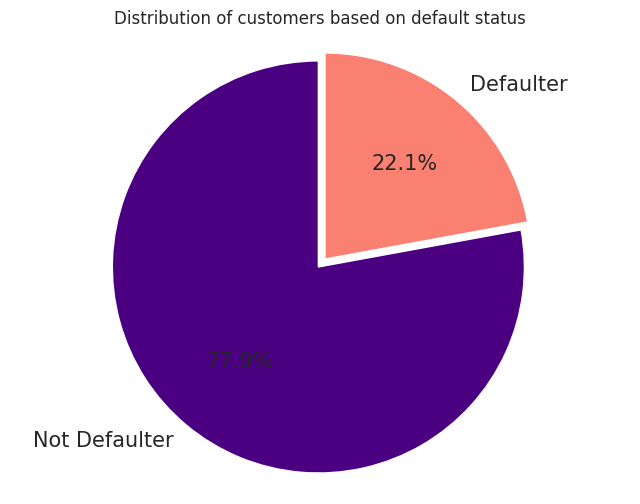

In [17]:
# plot the percentage of defaulter against non defaulters..
sns.set(style="white") 
label_counts = df['defaulter'].value_counts()
# draw the chart
plt.figure(figsize=(8, 6))
plt.pie(label_counts, 
        labels=label_counts.index, 
        autopct='%1.1f%%', startangle=90,
       colors = ['indigo','salmon'], 
        explode = [0,0.05], textprops = {"fontsize":15})
plt.title("Distribution of customers based on default status")
plt.axis('equal')
plt.show()

In [18]:
df['defaulter'].value_counts()

Not Defaulter    23364
Defaulter         6636
Name: defaulter, dtype: int64

- From the above, It is clear that about a quater (about 22%) of customers were defaulters while the rest of about 78% were non defaulters/



#### 2. Independent Variables.
- There are attributes that are not dependent on others.
- Analysis will involve single variables and also their relationships with others..

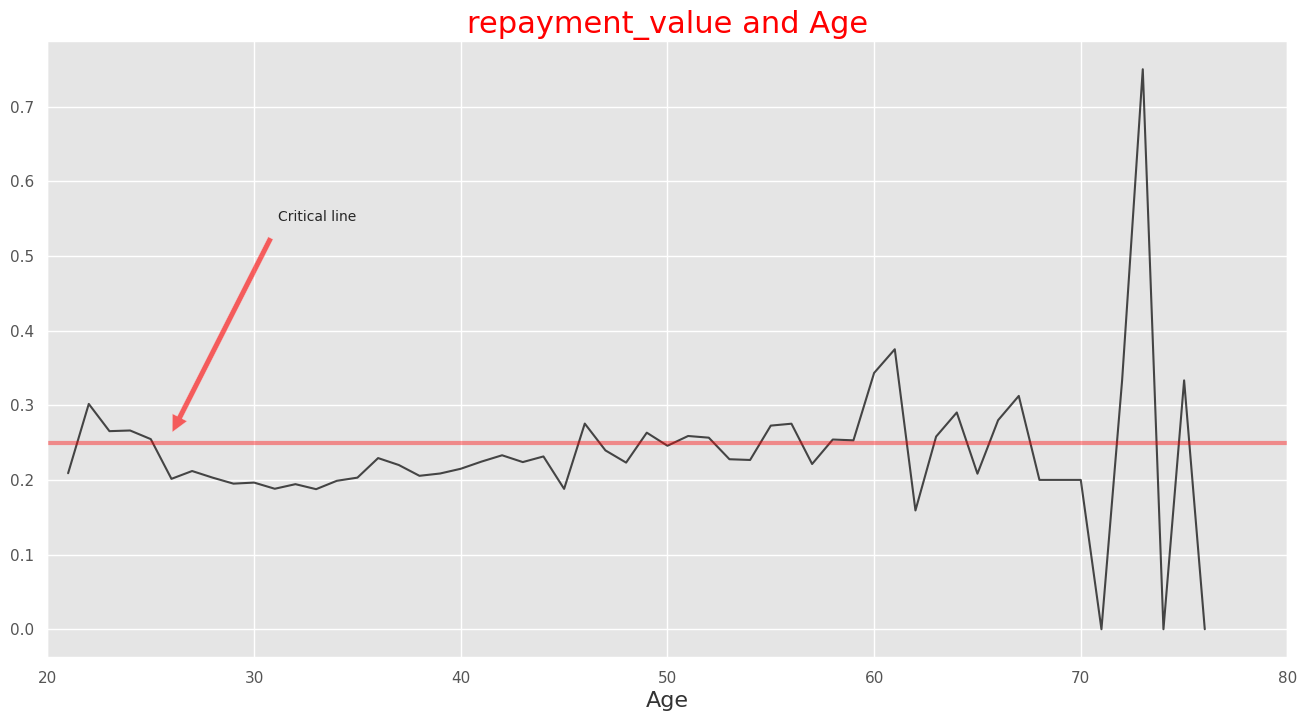

In [19]:
groupby_2=df.groupby('AGE')['label'].mean()

plt.figure(figsize=(16,8))
plt.style.use("ggplot")
plt.grid(True)
plt.plot(np.arange(21,77,1),groupby_2, color="black", alpha=0.7)
plt.hlines(0.25,xmin=20, xmax=80, color="red", alpha=0.4, linewidth=3)
plt.title("repayment_value and Age", color="red", size=22)
plt.xlabel("Age", color="black", alpha=0.8, size=16)
plt.annotate('Critical line',xy=(120, 200), xycoords='figure points', xytext=(80, 160),textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05, alpha=0.6))
plt.xlim(20,80)
plt.show()

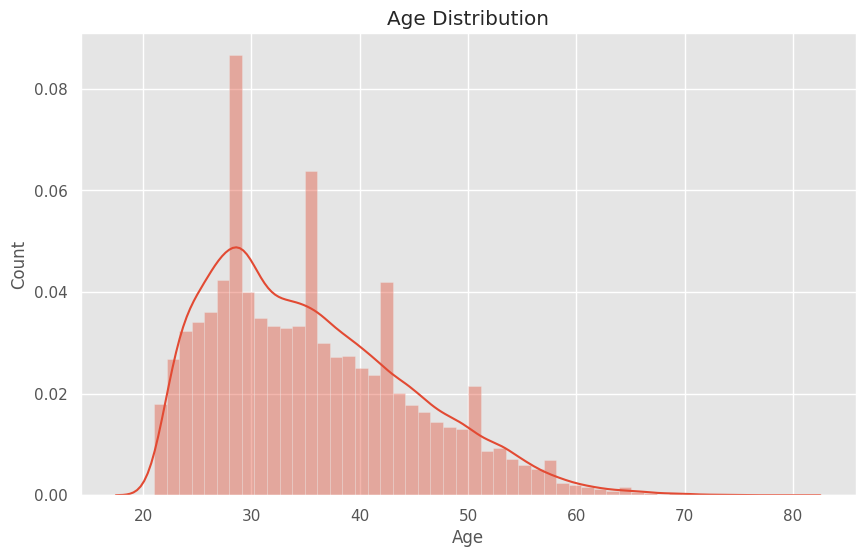

In [20]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.distplot(df.AGE)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

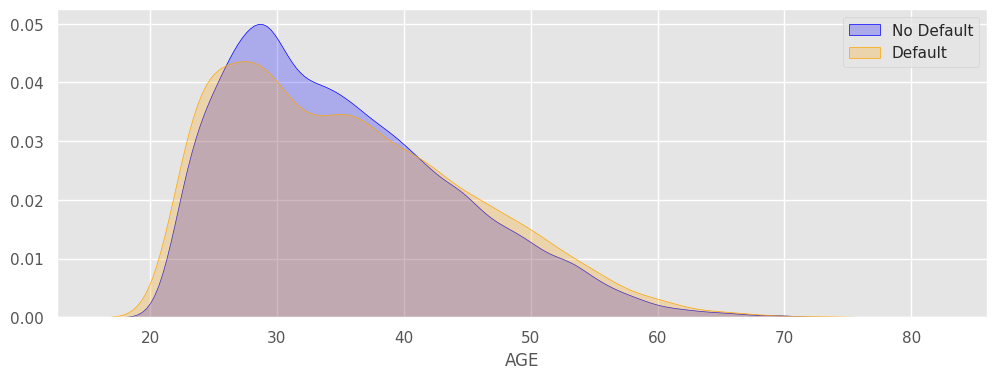

In [21]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['label'] == 0), 'AGE'], label = 'No Default', shade = True, color='blue')
sns.kdeplot(df.loc[(df['label'] == 1), 'AGE'], label = 'Default', shade = True, color='orange')
plt.ylabel('')
plt.legend()
plt.show()



###
- Majority of individual are aged between 24 and 45. This is the actual youth group where majority are trying to servive.
- As It can be seen that around this age, the chances of defaulting might not be large and is abit lower than age below 20 and above 45.
- To confirm this, I will break down the age into different age groups and try observe default rate between them.

In [22]:
# split ages into different bin groups
df['age_bins'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40,45, 50,55, 60, 80])

In [23]:
# check the bins created
df['age_bins'].value_counts()

(25, 30]    7142
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(40, 45]    3605
(45, 50]    2400
(50, 55]    1425
(55, 60]     572
(60, 80]     272
Name: age_bins, dtype: int64

In [24]:
# check against default status
df['defaulter'].groupby(df['age_bins']).value_counts(normalize = True)

age_bins  defaulter    
(20, 25]  Not Defaulter    0.733402
          Defaulter        0.266598
(25, 30]  Not Defaulter    0.798516
          Defaulter        0.201484
(30, 35]  Not Defaulter    0.805728
          Defaulter        0.194272
(35, 40]  Not Defaulter    0.783811
          Defaulter        0.216189
(40, 45]  Not Defaulter    0.778641
          Defaulter        0.221359
(45, 50]  Not Defaulter    0.749583
          Defaulter        0.250417
(50, 55]  Not Defaulter    0.752281
          Defaulter        0.247719
(55, 60]  Not Defaulter    0.736014
          Defaulter        0.263986
(60, 80]  Not Defaulter    0.731618
          Defaulter        0.268382
Name: defaulter, dtype: float64

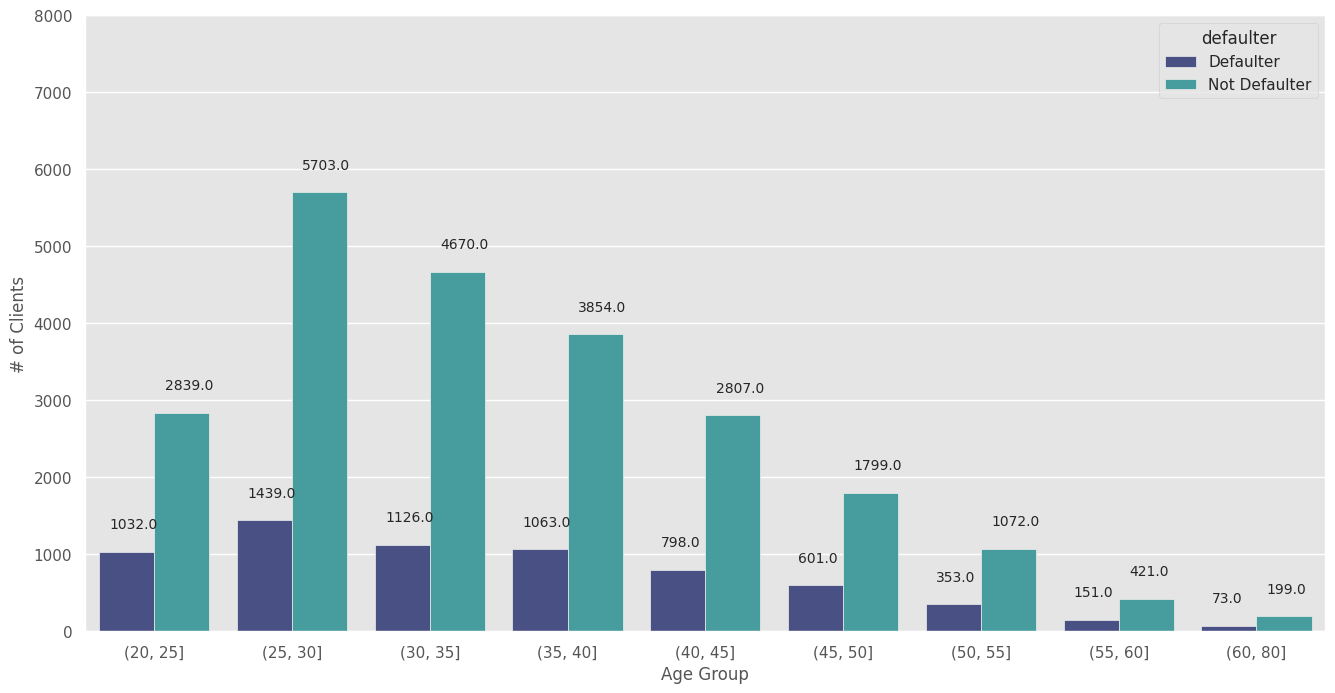

In [25]:
# plot this in order to obser it well
plt.figure(figsize=(16,8))

df['age_bins'] = df['age_bins'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 45]', '(45, 50]', '(50, 55]', '(55, 60]', '(60, 80]']
ax = sns.countplot(data = df, x = 'age_bins', hue="defaulter", palette = 'mako', order = AgeBin_order)
plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

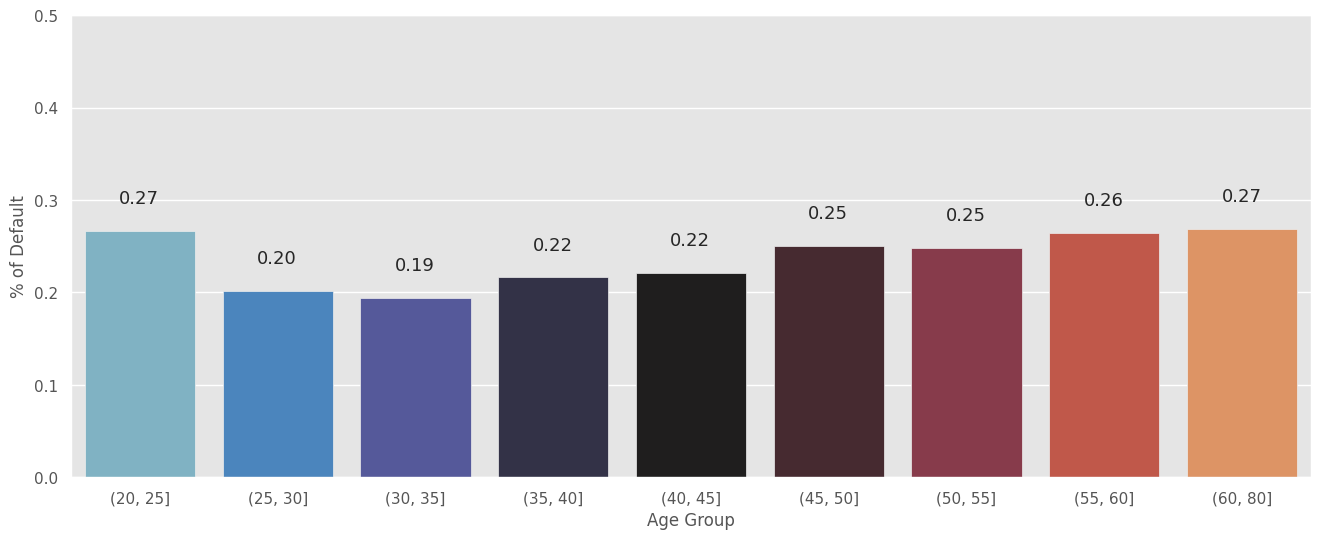

In [26]:
# to get a clear view on distribution, lets observe using absolute numbers per age group
plt.figure(figsize=(16,6))
ax = sns.barplot(x = "age_bins", y = "label", data = df, palette = 'icefire', ci = None, order = AgeBin_order)
plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)
plt.show()

- As we had seen ealier, the age between 25 and 50 have lower defaulting status when compaired to age bellow 20 and above 50 years.

In [27]:
# lets observe how gender is distributed among the customers..

df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [28]:
# gender against the default status
df['defaulter'].groupby(df['SEX']).value_counts(normalize = True)

SEX  defaulter    
1    Not Defaulter    0.758328
     Defaulter        0.241672
2    Not Defaulter    0.792237
     Defaulter        0.207763
Name: defaulter, dtype: float64

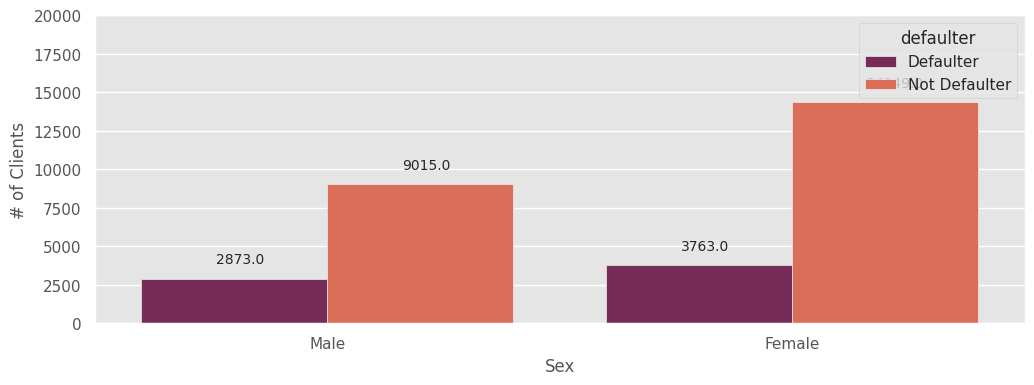

In [29]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'SEX', hue="defaulter", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

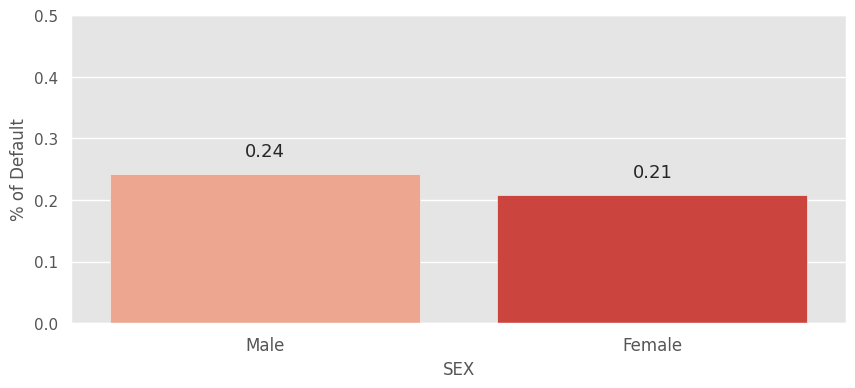

In [30]:
# default for male against female
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "SEX", y = "label", data = df, palette = 'Reds', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

###
- There are more females than male in our dataset and, apparently, men have a slightly higher chance of default. 
- This will also be confirmed by analysing throguh marital status and education

In [31]:
# 1 = graduate school; 2 = university; 3 = high school; 4 = others


# lets do analysis on the education of customers
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

- The data has 5,6 and 0 which needs to be similar to 4 as based on the description.
- This is what I will do below.

In [32]:
# merge 5,6 and 0 into 4
df.loc[(df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0), 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [33]:
# observation on mariage


# married; 2 = single; 3 = others
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

- Values 0 are genders not detemined. Instead of having this, lets merge them into the others category

In [34]:
# merge 0 into cat 3
df.loc[(df['MARRIAGE'] == 0), 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [35]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

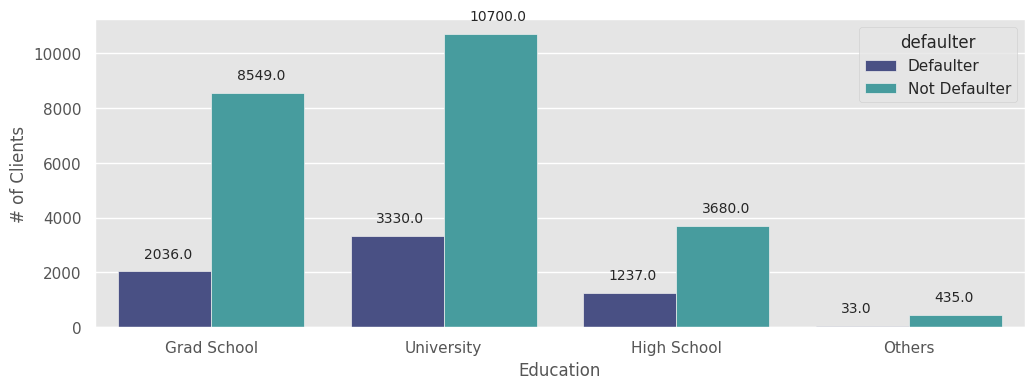

In [36]:

# how is education and default stattus related..
plt.figure(figsize=(12,4))
ax = sns.countplot(data = df, x = 'EDUCATION', hue="defaulter", palette = 'mako')
plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))
plt.show()

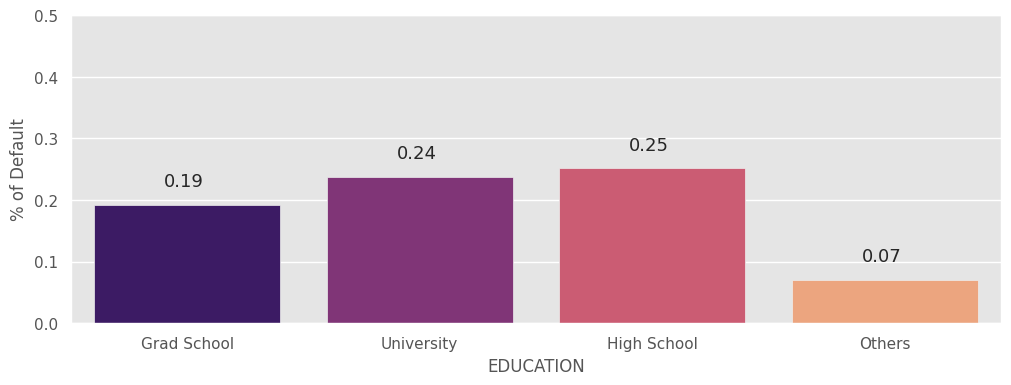

In [37]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "EDUCATION", y = "label", data = df, palette = 'magma', ci = None)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 11)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)
plt.show()

### Observation.
- When using the first graph, we can university having most number of defaulter. This is not the actual case when we look at their distribution. We find that most of the customers to the bank are university graduates hence meaning the more the number of clients in a certain education level the more likely to have more defaults.
- Due to this, we looked at the actual distribution of defaulters as per the number in that level.   Higher schoool level clients seems to slightly having the more chances of defaulting followed by university level.
- In general it means interms of defaulting, For every customer from high school level, there is a chance of 25% that they will default, 24% for University that they will default and 19% for Graduate that they will defalt.

In [38]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'label',
       'defaulter', 'age_bins'],
      dtype='object')

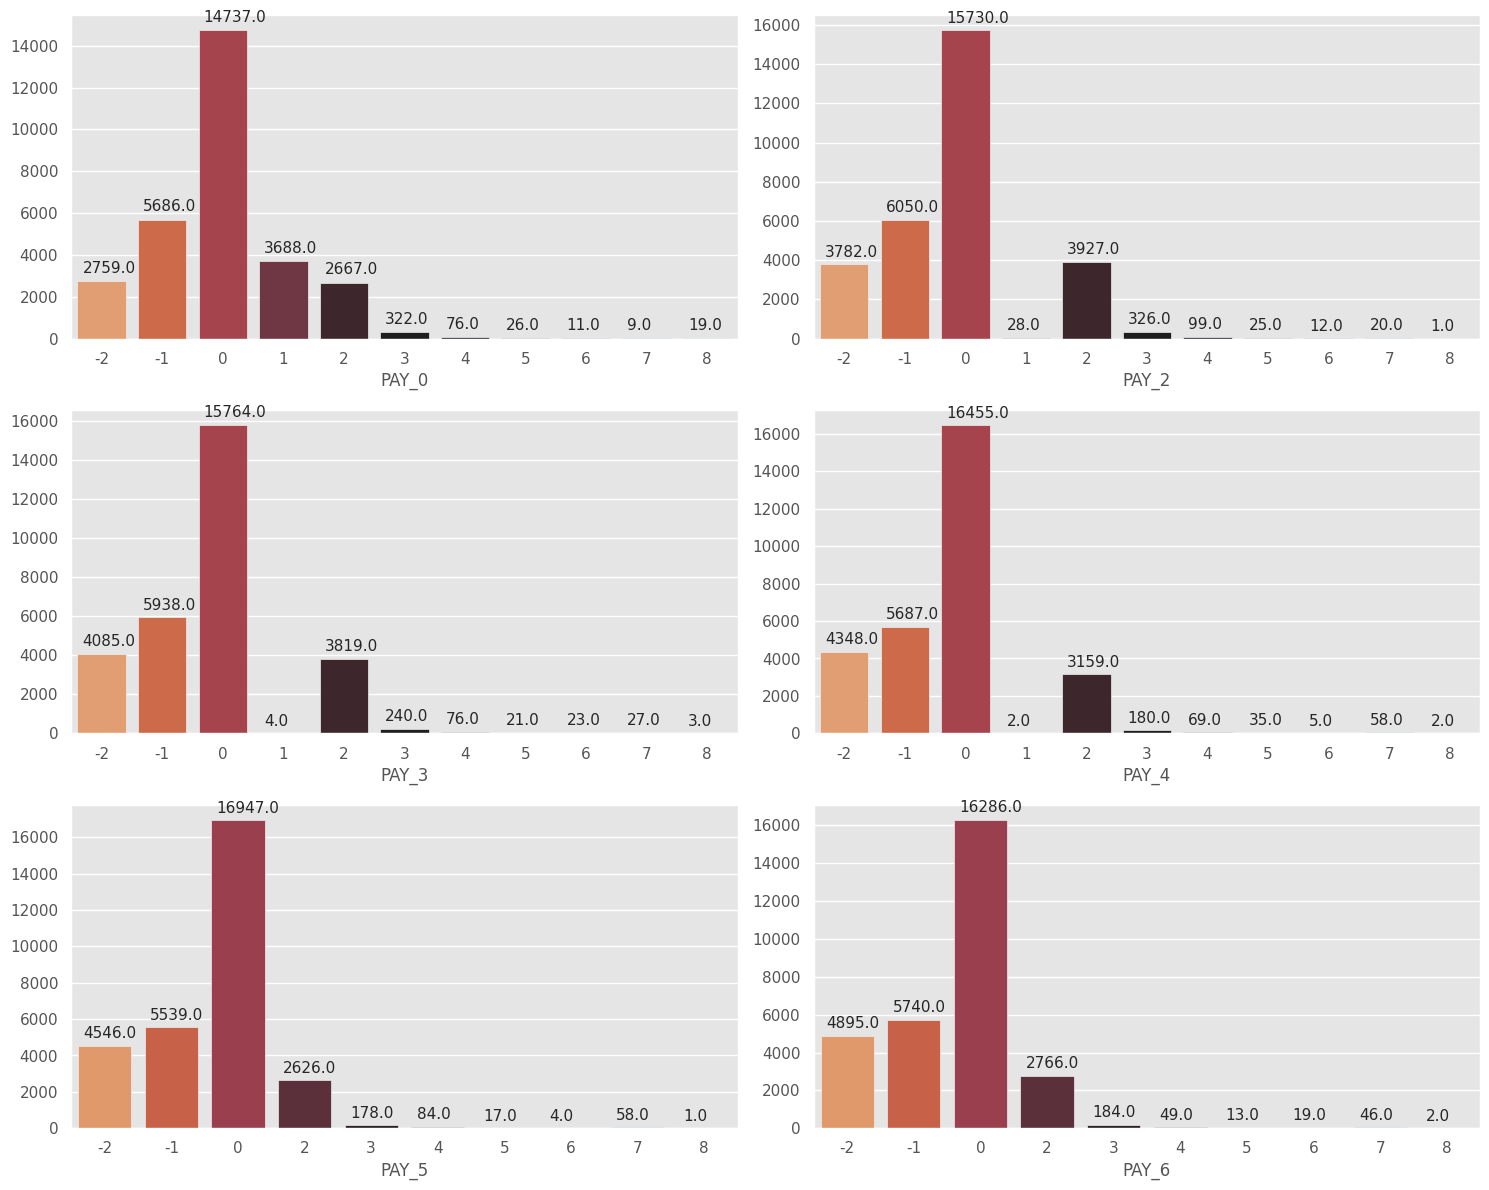

In [39]:
# lets now look for payment feature...
plt.figure(figsize=(15,12))
for i,col in enumerate(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(x = df[col], palette = 'icefire_r')
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.081, p.get_height()+400), fontsize = 11)

plt.show()

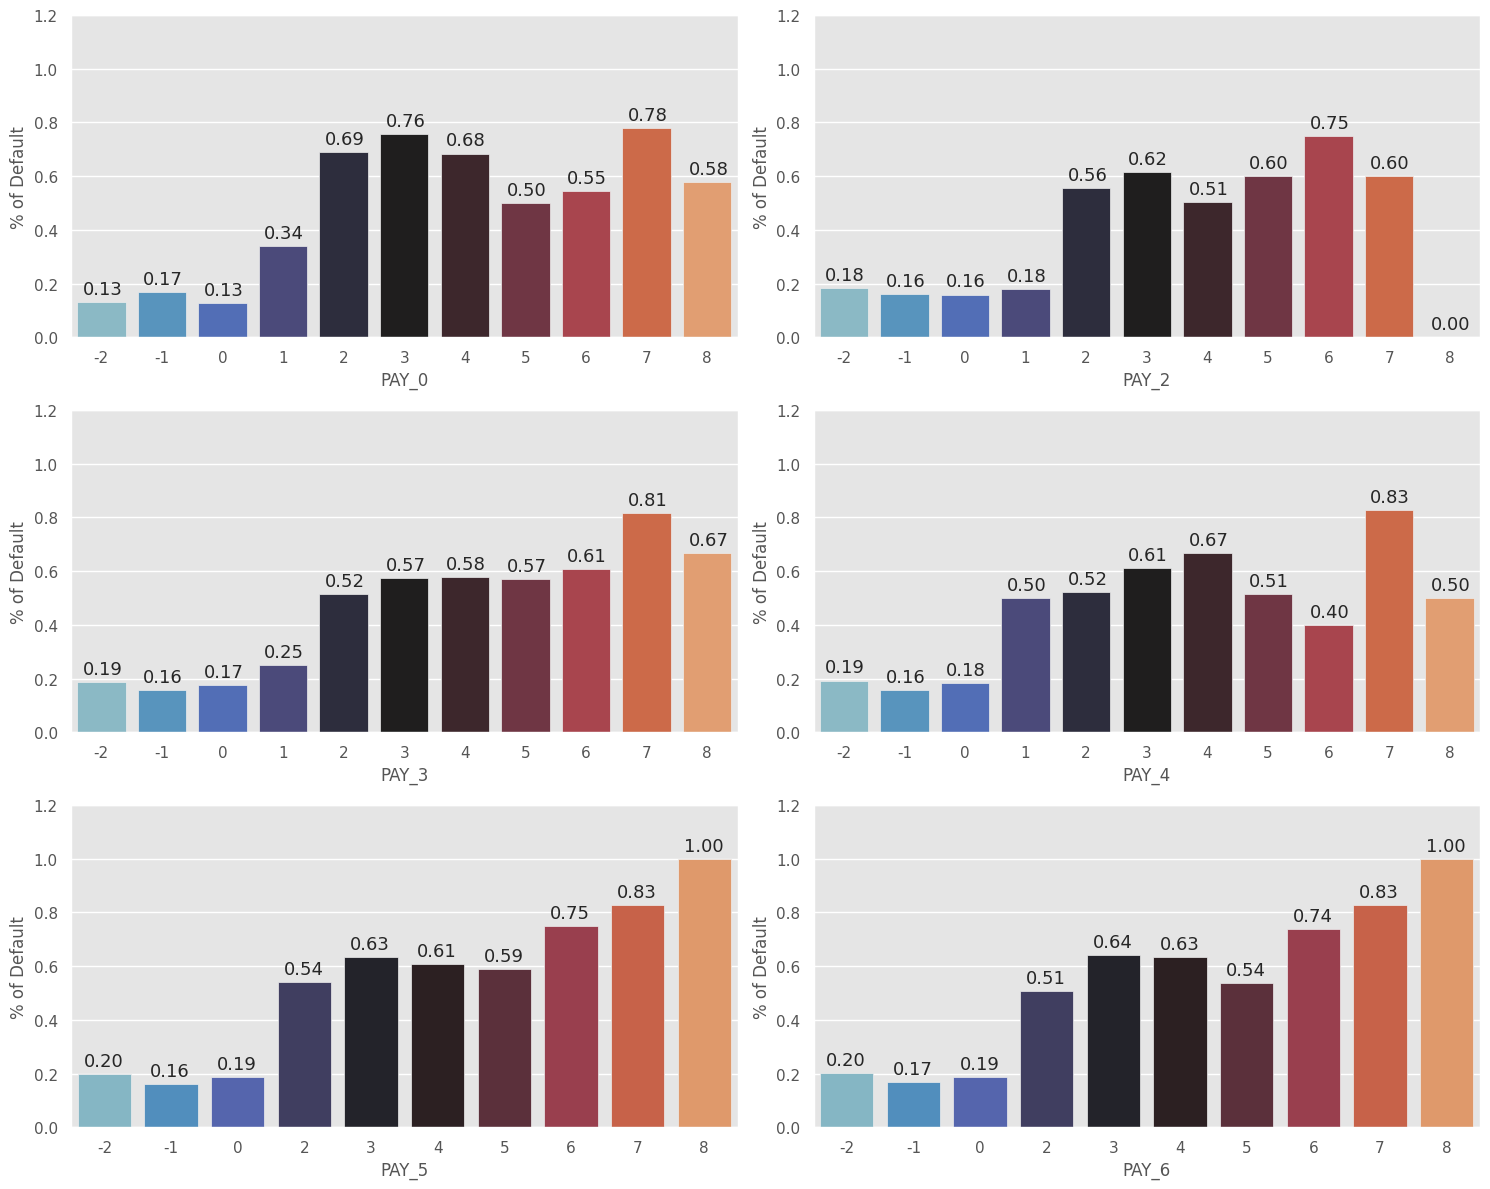

In [40]:
plt.figure(figsize=(15,12))

for i,col in enumerate(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "label", data = df, palette = 'icefire', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()


- We see that with most clients, with are paying the amount.

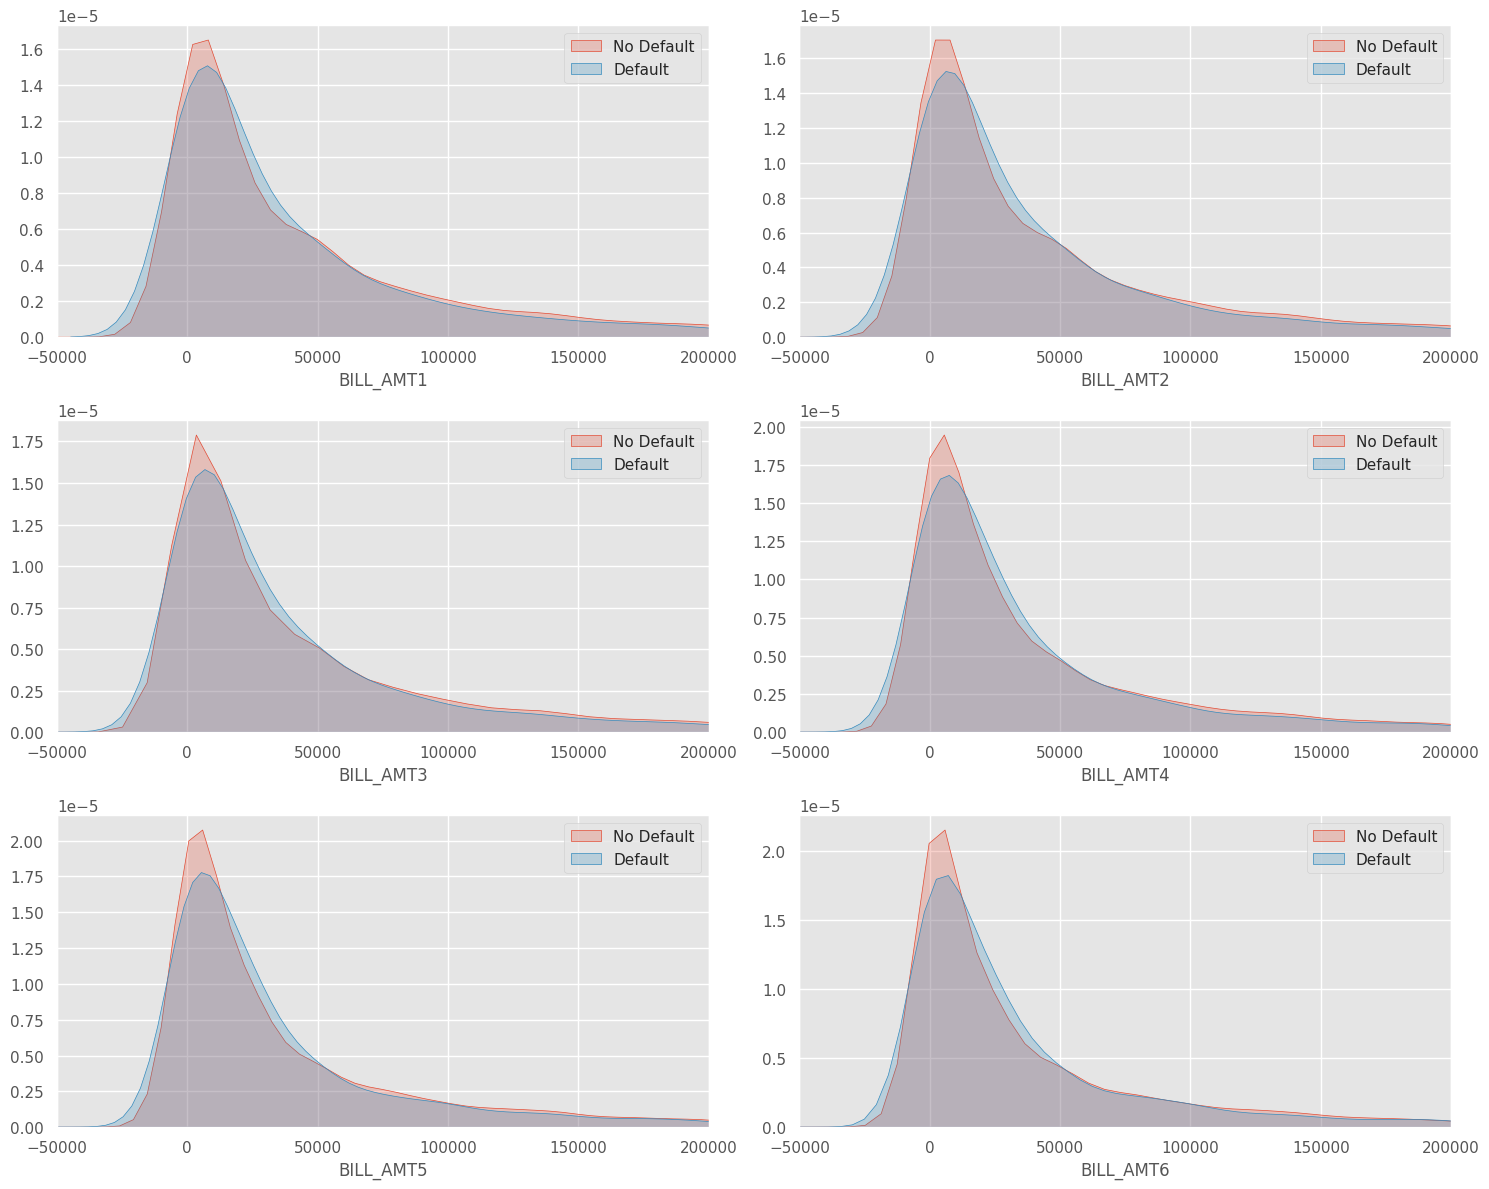

In [41]:
# Let analysis bi;; statement amount..


plt.figure(figsize=(15,12))
for i,col in enumerate(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['label'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['label'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

- It can be seen that those with -ve bill statement have lower chance of default than those with +ve/.

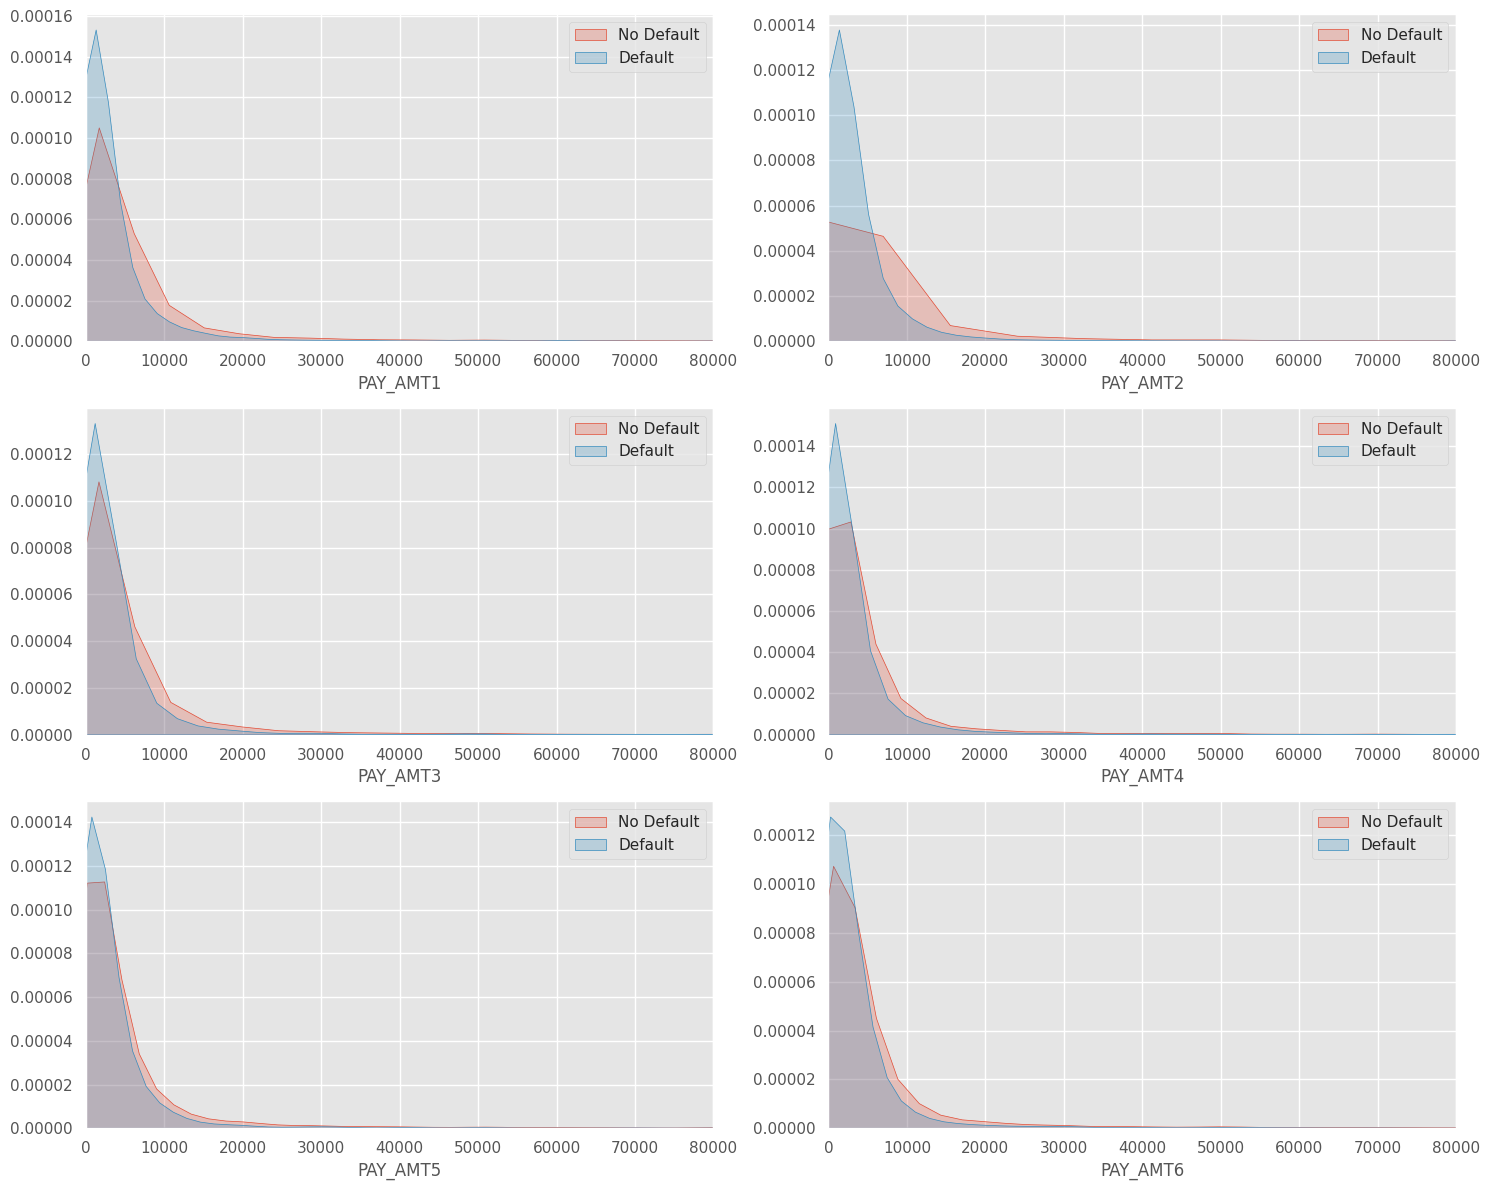

In [42]:
# checking on payment amount

plt.figure(figsize=(15,12))

for i,col in enumerate(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['label'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['label'] == 1), col], label = 'Default', shade = True)
    
    
    # lemme limit itto 80k
    plt.xlim(0, 80000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

- Seems like those who paid nothing in previous month has a higher chance of defaulting.
- Also the rate is lower for those with over 10k dollars.

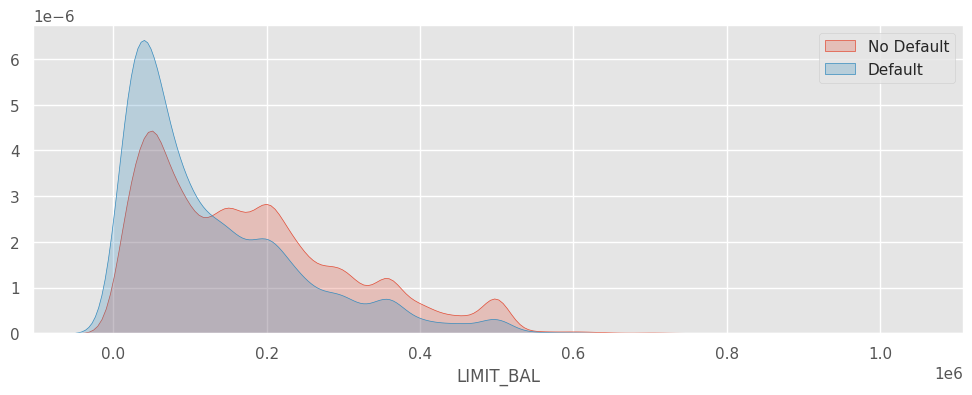

In [43]:
# checking on liming balance
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['label'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['label'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()
plt.show()

- We see that, in most customers, they have less than 200k dollars amount for limit balance.
- It is also seen that it is in this range that the default rate is higher.

- TO gain much information about the same, I will group the amount into different ranges and observe the probability of defaulting if you are in that range..

In [44]:
# create limit groups
df['LimitBin'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])

In [45]:
print(df['LimitBin'].value_counts(normalize=True))

(5000, 50000]        0.255867
(200000, 300000]     0.168633
(50000, 100000]      0.160733
(150000, 200000]     0.132600
(100000, 150000]     0.130067
(300000, 400000]     0.091967
(400000, 500000]     0.053267
(500000, 1100000]    0.006867
Name: LimitBin, dtype: float64


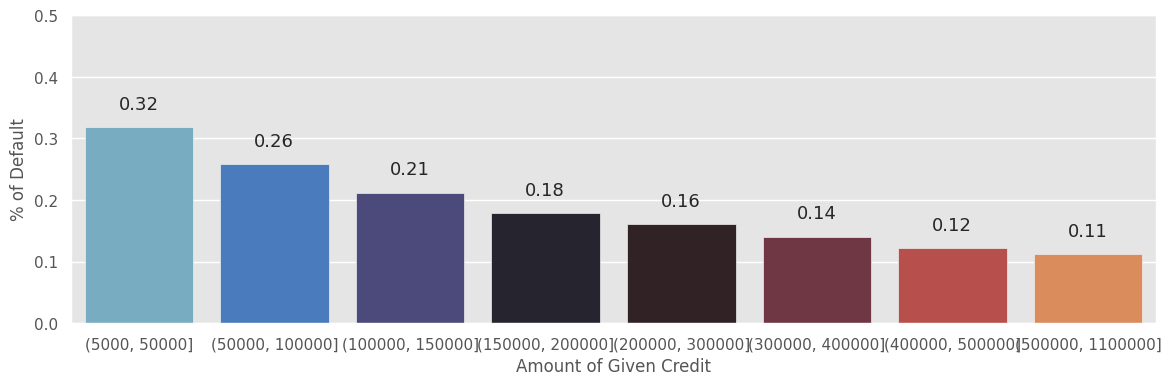

In [46]:
# plot probs of defaulting if you are in ths group
# first lets convert the limit group to string
df['LimitBin'] = df['LimitBin'].astype(str)
plt.figure(figsize=(14,4))
ax = sns.barplot(
    x = "LimitBin", 
    y = "label", 
    data = df, 
    palette = 'icefire', 
    ci = None, 
    order =  ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]'])
plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)
plt.show()

- As we have seen ealier. The less than 200k are the one with more default.
- It seems that default decreases with amount of created i.e the larger the amount the lesser the chance of defaulting and viceversa.



### Machine Learning.
- In this part, we will create and compaire 3 machine learning algorithm to observe if they are fit for our project.
- I will explore the performance of three different machine learning models: Logistic Regression, Decision Tree, and XGBOOST classifiers, using the dataset.
- First, I will conduct feature selection by choosing the training features and the target feature.
- Next, I will scale all the training features to ensure they are within the same range.
- After scaling, I will use logistic regression as the baseline model to assess its performance. The baseline model serves as a reference point, providing initial insights such as the minimum expected score, indications of overfitting, and helping us establish evaluation metrics.
- To measure the performance of the models, I will utilize the following evaluation metrics:
    - F1 Score: .
    - Accuracy Score.
    - Recall
    - Precision.
    - Confusion Matrix for results summarization.
    - OC AUC Curve

- Through the utilizing these metrics, I can evaluate the models' performance and determine their effectiveness in making accurate predictions.
- Below is the flow.....

In [47]:
# check the dataset
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label,defaulter,age_bins,LimitBin
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,Defaulter,"(20, 25]","(5000, 50000]"
2,120000,2,2,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,Defaulter,"(25, 30]","(100000, 150000]"
3,90000,2,2,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,Not Defaulter,"(30, 35]","(50000, 100000]"
4,50000,2,2,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,Not Defaulter,"(35, 40]","(5000, 50000]"
5,50000,1,2,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,Not Defaulter,"(55, 60]","(5000, 50000]"


In [48]:
# check datatypes
df.dtypes

LIMIT_BAL     int64
SEX           int64
EDUCATION     int64
MARRIAGE      int64
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
label         int64
defaulter    object
age_bins     object
LimitBin     object
dtype: object

- We have agebins and limit bins, they are going to be converted to numerical through label encoding while defaulter will be droped since it was to be used for visualizations only.

In [49]:
# drop the defaulter column
df.drop("defaulter", axis=1, inplace=True)

In [50]:
ENCODING_COLS = ["LimitBin", "age_bins"]


# create encoder object
lbl_encoder = LabelEncoder()

for col in ENCODING_COLS:
    df[col] = lbl_encoder.fit_transform(df[col])

In [51]:
# check if the columns have been converted.
df.select_dtypes("object").columns

Index([], dtype='object')

- We now have all columns together, the next thing, we will get the training features and target.

In [52]:
# get x features and Y features
X = df.drop("label", axis=1)
Y = df["label"]

In [53]:
# check their shapes
X.shape, Y.shape

((30000, 25), (30000,))

In [54]:
# check if there are any nulls present
X.isna().sum(), Y.isna().sum()

(LIMIT_BAL    0
 SEX          0
 EDUCATION    0
 MARRIAGE     0
 AGE          0
 PAY_0        0
 PAY_2        0
 PAY_3        0
 PAY_4        0
 PAY_5        0
 PAY_6        0
 BILL_AMT1    0
 BILL_AMT2    0
 BILL_AMT3    0
 BILL_AMT4    0
 BILL_AMT5    0
 BILL_AMT6    0
 PAY_AMT1     0
 PAY_AMT2     0
 PAY_AMT3     0
 PAY_AMT4     0
 PAY_AMT5     0
 PAY_AMT6     0
 age_bins     0
 LimitBin     0
 dtype: int64,
 0)

In [55]:
# lets now scale the training features


scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [56]:
X_scaled = scaler.transform(X)

- I will split the data into two, Training and validation.
- The training set will be 80% while 20% will be used for Testing

In [57]:
# split the data into training and testing.

Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X_scaled, 
    Y, test_size = 0.2, random_state = 2023, stratify=Y)

In [58]:
# check the shapes
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((24000, 25), (6000, 25), (24000,), (6000,))

### Functions To Evaluate the model.
- I will create the functions to be used to evaluate the models.
- Based on the above description metrics, I will have a function to plot and also to print as follows.

In [59]:
def evaluate_model(y_true, y_pred, modelName):
    # find evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')

    # get evaluation summary
    print(f"\n****** Evaluation Summary for the model {modelName} *********\n")
    print(f"Accuracy:   {accuracy:.5f}")
    print(f"F1 Score:  {f1:.5f}")
    print(f"Recall Score:  {recall:.5f}")
    print(f"Precision Score  {precision:.5f} ")
    print("\n")

    # build confusion matrix
    labels = ["NON DEFAULT", "DEFAULT"]
    cm = confusion_matrix(y_true, y_pred)

    # build a labeled confusion matrix DataFrame
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Reds")
    plt.title(f"Confusion Matrix - {modelName}", fontsize=16, fontweight='bold')
    plt.xlabel("Predicted", fontsize=14, fontweight='bold')
    plt.ylabel("Actual", fontsize=14, fontweight='bold')
    plt.show()

In [60]:
# for ploting the pr and recall
import scikitplot as skplt
def ROC_PR_curves(model_name, model, Xtest, Ytest):
    """
    This function plots the ROC curve and Precision-Recall curve based on the model's probabilities of Xtest.
    """
    # get probability predictions
    probas = model.predict_proba(Xtest)
    # plot the ROC curve
    skplt.metrics.plot_roc(np.array(Ytest), probas, figsize=(8, 6))
    plt.title(f"ROC Curves on Performance for {model_name}", fontsize=16, fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.show()
    # plot the Precision-Recall curve
    skplt.metrics.plot_precision_recall(np.array(Ytest), probas, figsize=(8, 6))
    plt.title(f"PR Curves on Performance for {model_name}", fontsize=16, fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.show()

### Model 1: Logistic Regression


In [61]:
# define the model object
log_clf =  LogisticRegression(class_weight='balanced')

# create the training
log_clf.fit(Xtrain, Ytrain)


# get the general score
log_clf.score(Xtest, Ytest)

0.6935


****** Evaluation Summary for the model Logistic Regression Classifier *********

Accuracy:   0.69350
F1 Score:  0.71587
Recall Score:  0.69350
Precision Score  0.76628 




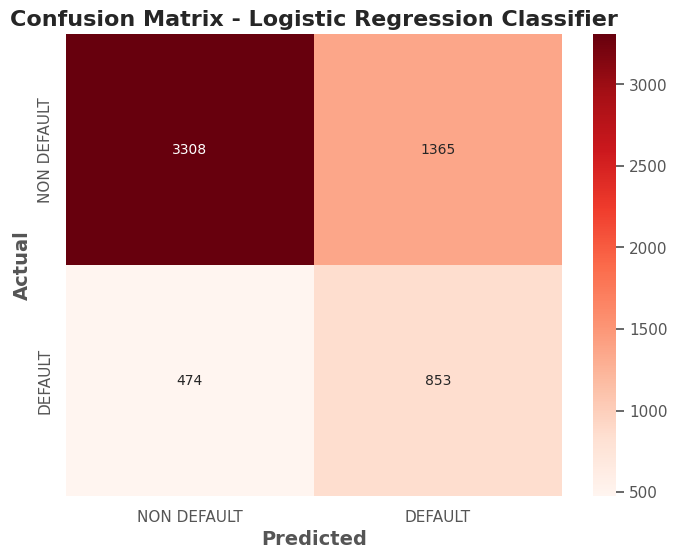

In [62]:
# call the function for evaluation
evaluate_model(Ytest, log_clf.predict(Xtest), "Logistic Regression Classifier")

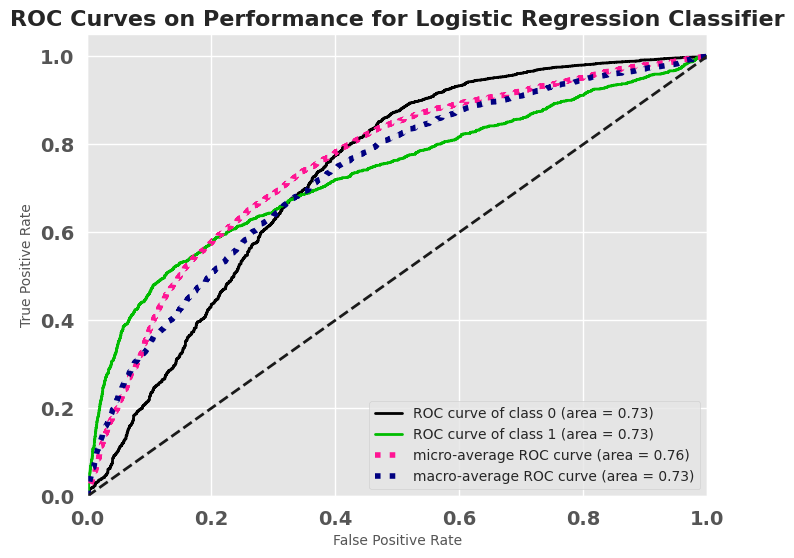

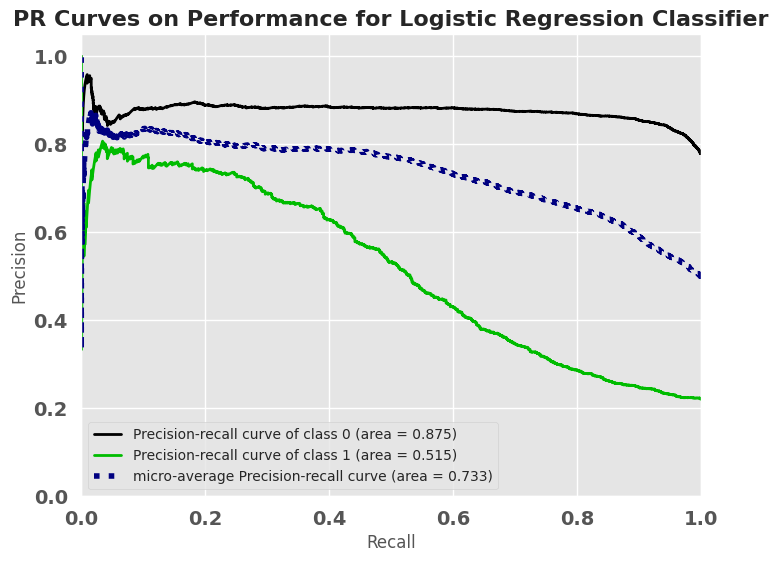

In [63]:
# plot the PR and ROC curves
ROC_PR_curves("Logistic Regression Classifier", log_clf, Xtest, Ytest)

### Model2 : Decision Tree Classifier.

In [64]:
# lets create decision tree object and train it...
dec_clf = DecisionTreeClassifier(class_weight='balanced')
# train
dec_clf.fit(Xtrain, Ytrain)

# get the score
dec_clf.score(Xtest, Ytest)

0.721


****** Evaluation Summary for the model Decion Tree Classifier *********

Accuracy:   0.72100
F1 Score:  0.72196
Recall Score:  0.72100
Precision Score  0.72295 




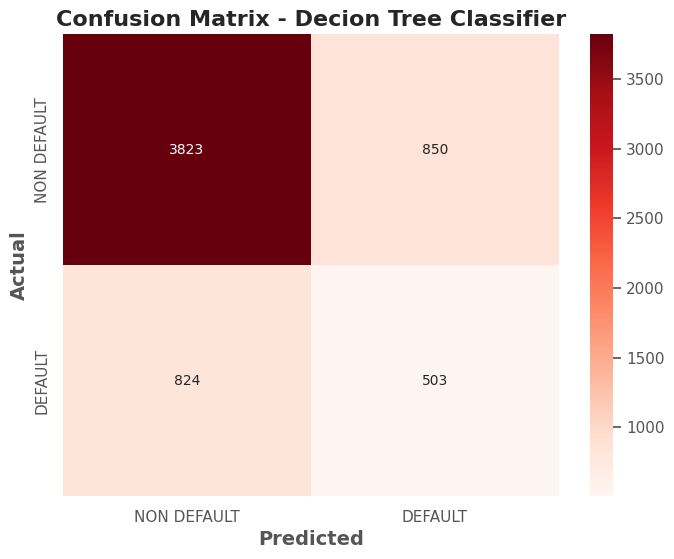

In [65]:
# call the function for evaluation
evaluate_model(Ytest, dec_clf.predict(Xtest), "Decion Tree Classifier")

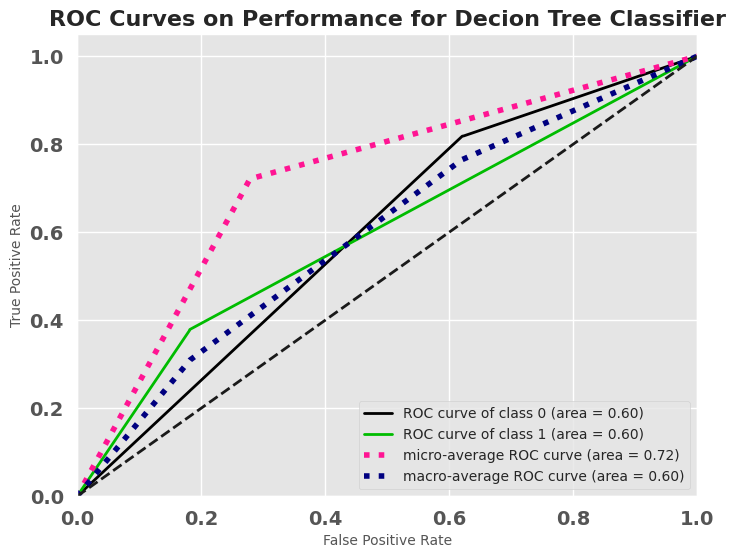

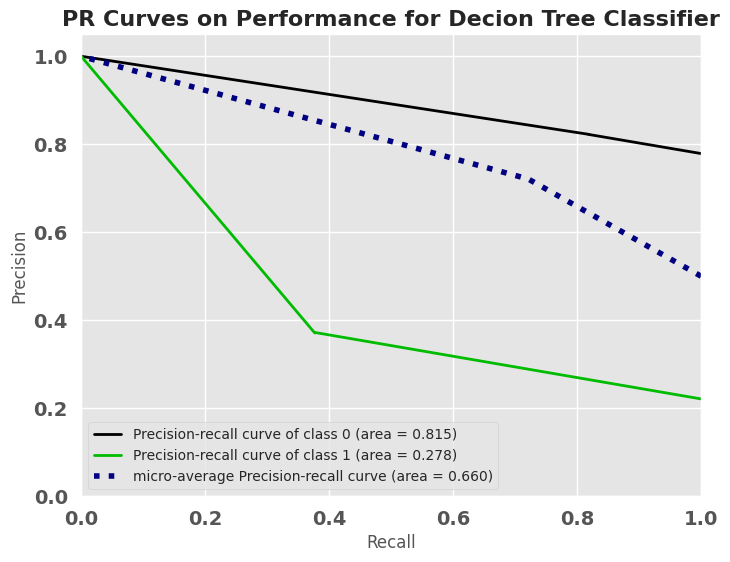

In [66]:
# plot the PR and ROC curves
ROC_PR_curves("Decion Tree Classifier", dec_clf, Xtest, Ytest)

### Model3; XGBOOST CLASSIFIER.

In [67]:
# create the xgboost object for the model
xgb_clf = XGBClassifier(n_estimators=500, class_weight='balanced')

# get the model trained
xgb_clf.fit(Xtrain, Ytrain)

# get general score
xgb_clf.score(Xtest, Ytest)

[21:03:16] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



0.8073333333333333


****** Evaluation Summary for the model XGBOOST Classifier *********

Accuracy:   0.80733
F1 Score:  0.78986
Recall Score:  0.80733
Precision Score  0.78762 




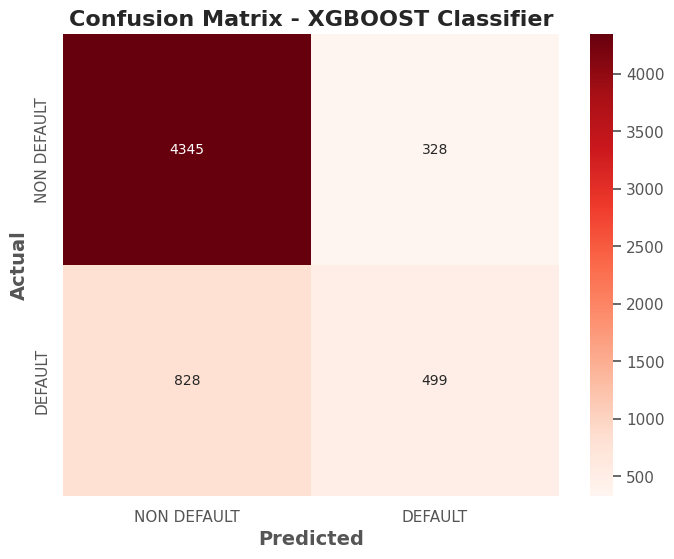

In [68]:
# get the evaluations for the metrics
evaluate_model(Ytest, xgb_clf.predict(Xtest), "XGBOOST Classifier")

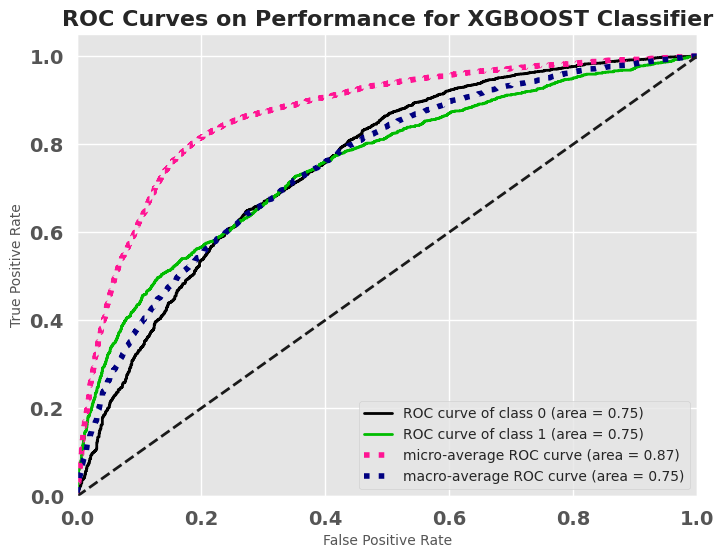

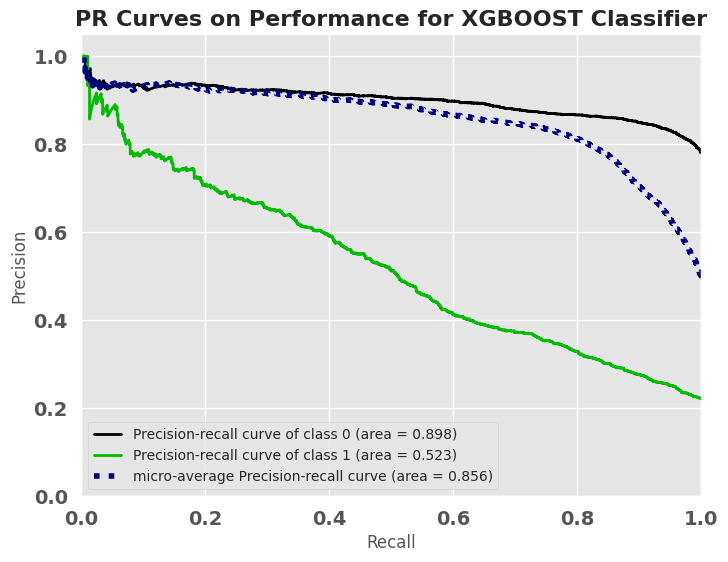

In [69]:
# plot the PR and ROC curves
ROC_PR_curves("XGBOOST Classifier", xgb_clf, Xtest, Ytest)

### Balancing the classes.
- As from the above, default labels were minimal, lets now try class balancing in order to handle class imbalnce. This might help us get better model.
- Lets recreate the model with balanced classes.


- In this case, I will need to balance them at 10k on majority label for training set. So my function will try to upsample the minaroty upto x records as shown below.

In [70]:
# labels distribution
df.label.value_counts()

0    23364
1     6636
Name: label, dtype: int64

In [71]:
df.shape

(30000, 26)

In [72]:
# Lets get the sample randommly
# majority is class 0
df_sampled = pd.concat([df[df["label"] ==0].sample(10000, random_state=2023), df[df["label"] ==1]]).reset_index(drop=True)

In [73]:
# lets rescale the data
X_sampled = scaler.transform(df_sampled.drop("label", axis=1))
Y_sampled = df_sampled['label']

In [74]:
# check their shape
X_sampled.shape, Y_sampled.shape

((16636, 25), (16636,))

In [75]:
# split into training and tesgting in the sample ratio as above

Xtrain_sample, Xtest_sample, Ytrain_sample, Ytest_sample = train_test_split(
    X_sampled, 
    Y_sampled, test_size = 0.2, random_state = 2023, stratify=Y_sampled)

In [76]:
# rrecheck ourr new shapes
Xtrain_sample.shape, Xtest_sample.shape, Ytrain_sample.shape, Ytest_sample.shape

((13308, 25), (3328, 25), (13308,), (3328,))

### Training the models with Undersampled Data
- We then retrain the above algrorithms with this new data




### 1. Logistic Regression...

In [77]:
# define the model object
log_clf_sampled =  LogisticRegression()
# create the training
log_clf_sampled.fit(Xtrain_sample, Ytrain_sample)

# get the general score
log_clf_sampled.score(Xtest_sample, Ytest_sample)

0.7214543269230769


****** Evaluation Summary for the model Undersampled  Logistic Regression Classifier *********

Accuracy:   0.72145
F1 Score:  0.70363
Recall Score:  0.72145
Precision Score  0.72689 




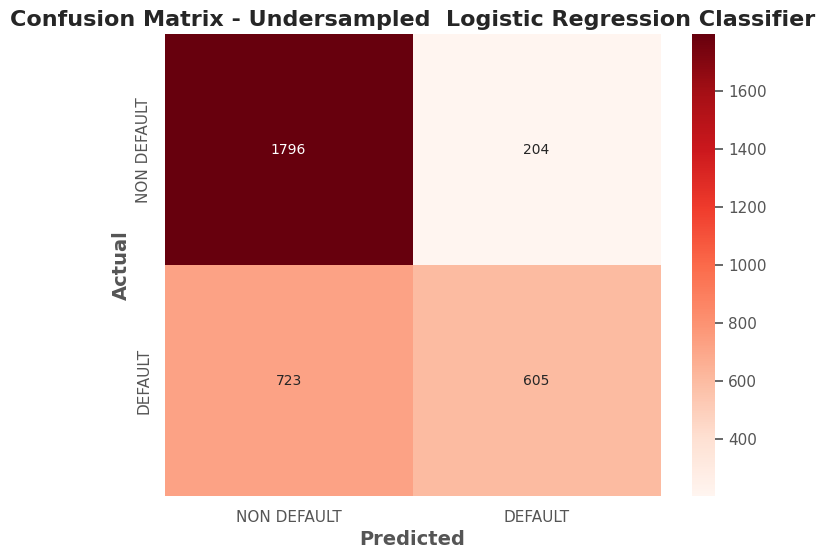

In [78]:
# call the function for evaluation
evaluate_model(Ytest_sample, log_clf_sampled.predict(Xtest_sample), "Undersampled  Logistic Regression Classifier")

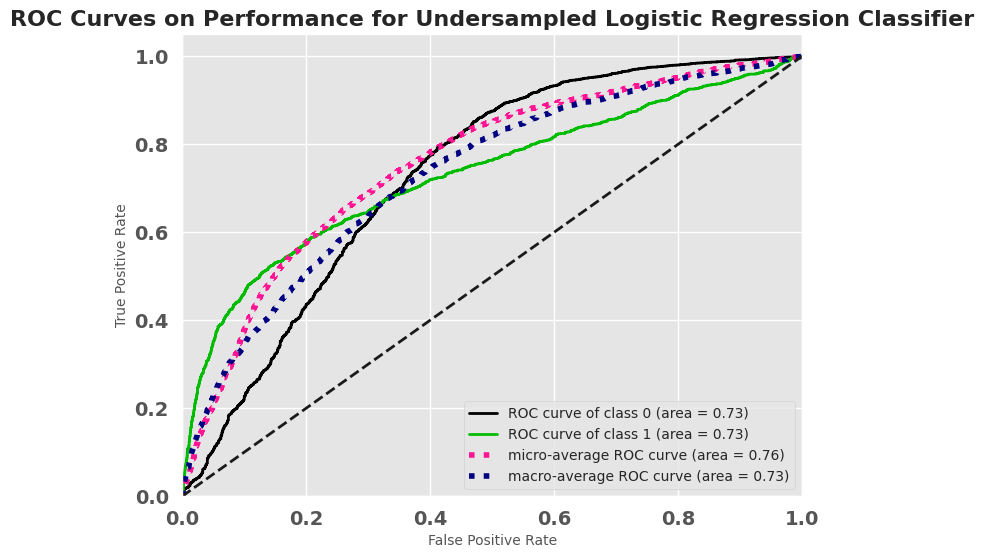

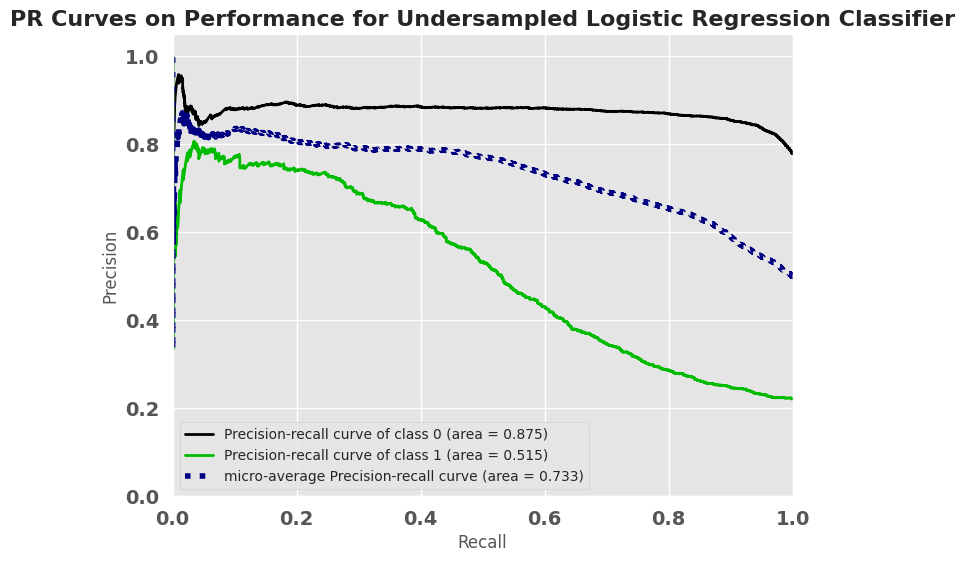

In [79]:
# plot the PR and ROC curves
ROC_PR_curves("Undersampled Logistic Regression Classifier", log_clf, Xtest, Ytest)

### 2. Decision Tree Classifier..

In [80]:
# lets create decision tree object and train it...
dec_clf_sample = DecisionTreeClassifier()
# train
dec_clf_sample.fit(Xtrain_sample, Ytrain_sample)
# get the score
dec_clf_sample.score(Xtest_sample, Ytest_sample)

0.6394230769230769


****** Evaluation Summary for the model Undersample Decion Tree Classifier *********

Accuracy:   0.63942
F1 Score:  0.64028
Recall Score:  0.63942
Precision Score  0.64131 




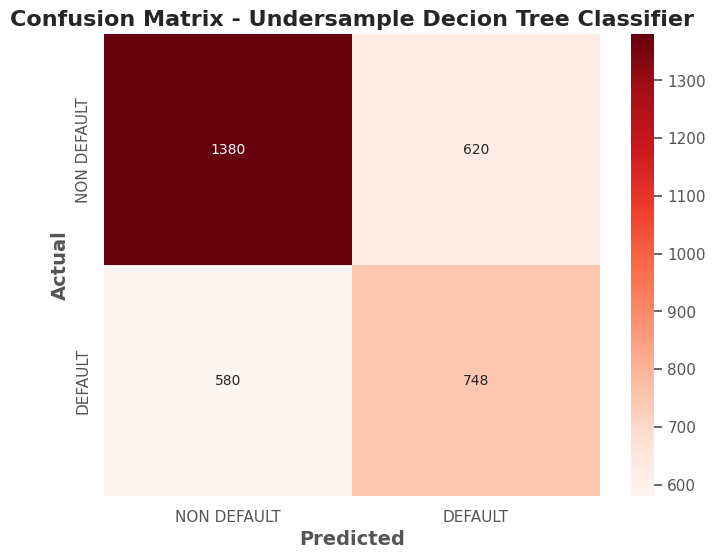

In [81]:
# call the function for evaluation
evaluate_model(Ytest_sample, dec_clf_sample.predict(Xtest_sample), "Undersample Decion Tree Classifier")

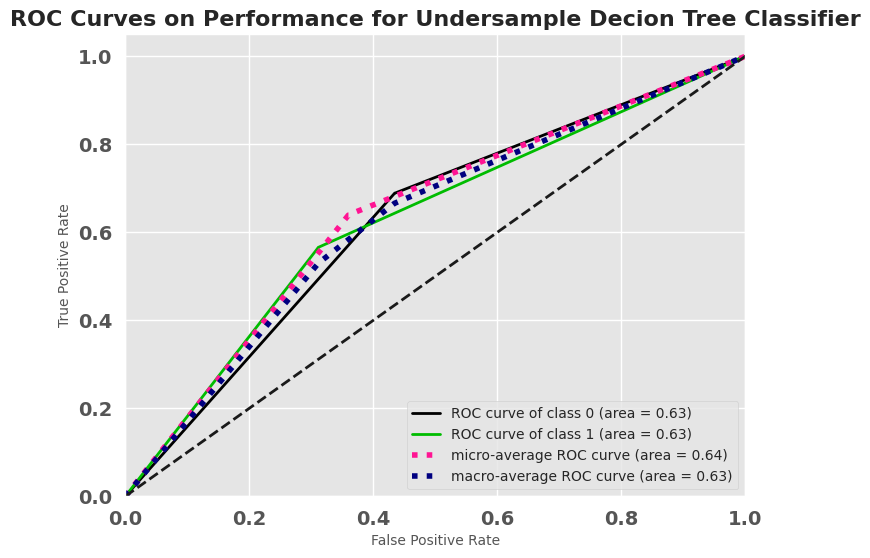

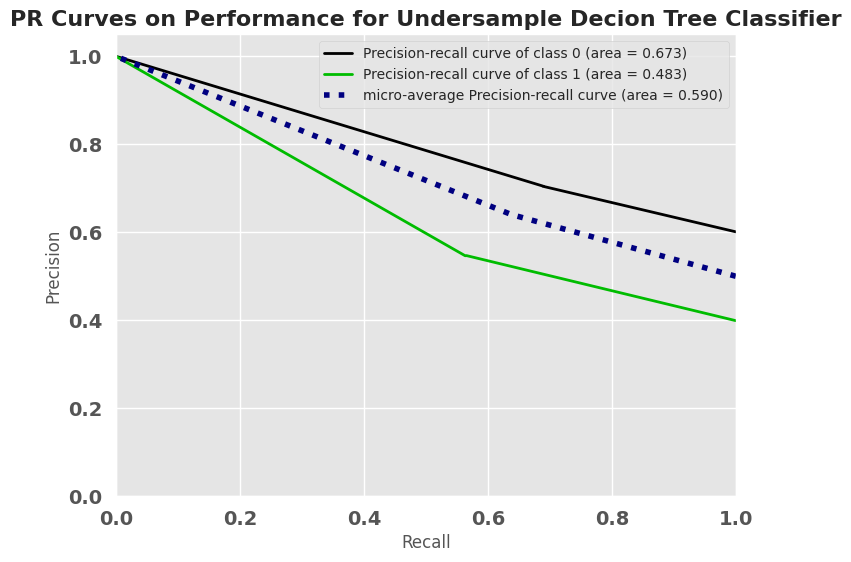

In [82]:
# plot the PR and ROC curves
ROC_PR_curves("Undersample Decion Tree Classifier", dec_clf_sample, Xtest_sample, Ytest_sample)

### 3. XGBOOST REGRESSION>.

In [83]:
# create the xgboost object for the model
xgb_clf_sample = XGBClassifier(n_estimators=1000)
# get the model trained
xgb_clf_sample.fit(Xtrain_sample, Ytrain_sample)
# get general score
xgb_clf_sample.score(Xtest_sample, Ytest_sample)

0.7022235576923077


****** Evaluation Summary for the model Undersampled XGBOOST Classifier *********

Accuracy:   0.70222
F1 Score:  0.69843
Recall Score:  0.70222
Precision Score  0.69795 




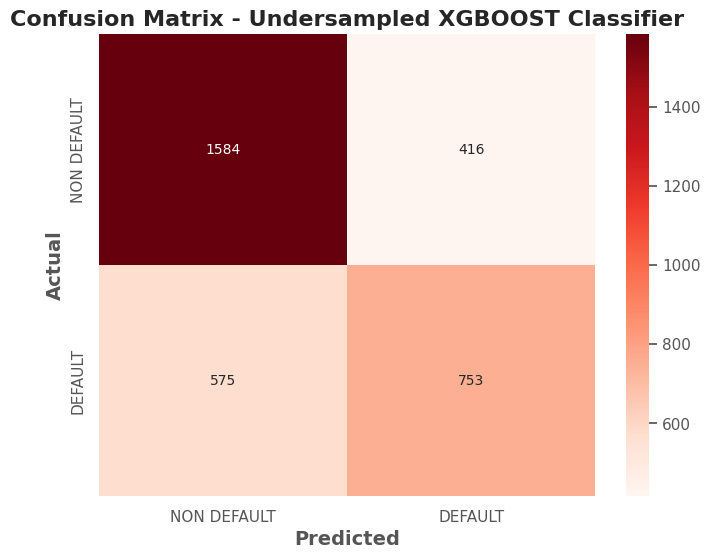

In [84]:
# get the evaluations for the metrics
evaluate_model(Ytest_sample, xgb_clf_sample.predict(Xtest_sample), "Undersampled XGBOOST Classifier")

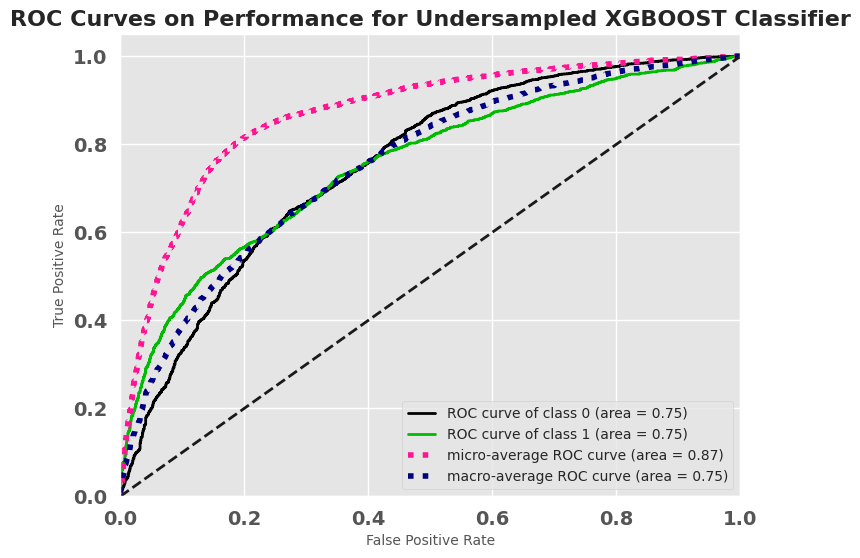

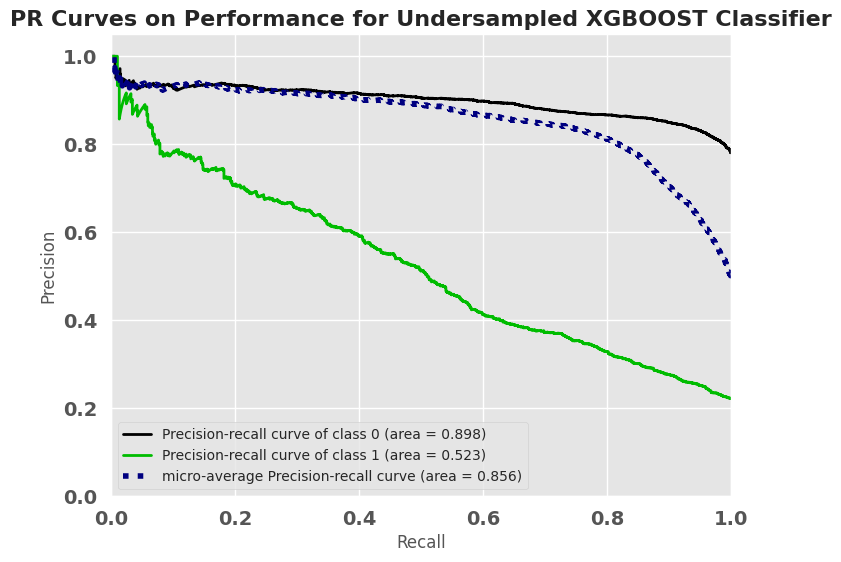

In [85]:
# plot the PR and ROC curves
ROC_PR_curves("Undersampled XGBOOST Classifier", xgb_clf, Xtest, Ytest)

In [86]:
# a function to evaluate the models
def develop_perfomance_table(models, Xtest, Ytest):
    """
        Ths function help in generating a performance table for the given models' comparison.
    """
    performance_table = pd.DataFrame(columns=["Accuracy", "F1 Score", "Precision", "Recall", "Misclassification Count"])
    #iterate through the models keys and names
    for name, model in models.items():
        y_pred = model.predict(Xtest)
        accuracy = accuracy_score(Ytest, y_pred)
        f1 = f1_score(Ytest, y_pred, average='weighted')
        precision = precision_score(Ytest, y_pred, average='weighted')
        recall = recall_score(Ytest, y_pred, average='weighted')
        cm = confusion_matrix(Ytest, y_pred)
        misclassification_count = cm.sum() - cm.trace()
        performance_table = performance_table.append({"Accuracy": accuracy, 
                                                      "F1 Score": f1, 
                                                      "Precision": precision, 
                                                      "Recall": recall, 
                                                      "Misclassification Count": misclassification_count,
                                                      "Percentage MisClassification": misclassification_count/Xtest.shape[0]
                                                     }, 
                                                     ignore_index=True)
    performance_table.index = models.keys()
    return performance_table.sort_values(by= 'F1 Score')

In [87]:
# created a data for original data
original_scores = develop_perfomance_table({
    "Original Logistic Regression":log_clf, "Original XGBOOST Classifier":xgb_clf,
    "Original Decision Tree Classifier": dec_clf
},
    Xtest, Ytest
)

In [88]:
original_scores

,Accuracy,F1 Score,Precision,Recall,Misclassification Count,Percentage MisClassification
Original Logistic Regression,0.693500,0.715868,0.766278,0.693500,1839.0,0.306500
Original Decision Tree Classifier,0.721000,0.721964,0.722954,0.721000,1674.0,0.279000
Original XGBOOST Classifier,0.807333,0.789864,0.787621,0.807333,1156.0,0.192667


### Results on Original Data..
- The results obtained from these classifiers provide insights into their performance on the dataset as follows.
- The XGBOOST Classifier had the highest accuracy, correctly classifying approximately 80.7% of the samples. It also achieved a good balance between precision and recall, as indicated by the highest F1 score of 0.7899. Moreover, the XGBOOST Classifier exhibited the highest precision (0.7876) and recall (0.8073), effectively identifying positive cases. With the lowest misclassification count (1156) and percentage misclassification (0.1927), it proved to be the most accurate model overall.
- The Decision Tree Classifier ranked second in most of the evaluation metrics. It had an accuracy of 0.733 and an F1 score of 0.756, indicating its ability to make reasonably accurate predictions. The model's precision of 0.8523 demonstrated its capability to correctly identify positive cases. However, it had a slightly higher misclassification count (1599) and percentage misclassification (0.2665) compared to the XGBOOST Classifier.
- Logistic Regression, although having the lowest performance among the three models, still achieved an accuracy of 0.6905 and an F1 score of 0.7137. Its precision of 0.7685 indicated a decent ability to correctly predict positive cases. However, it had the highest misclassification count (1857) and percentage misclassification (0.3095) among the three classifiers.

- In general, the XGBOOST Classifier outperformed the other models in terms of accuracy, F1 score, precision, recall, and misclassification metrics. 

In [89]:
# created a data for original data
undersampled_scores = develop_perfomance_table({
    "Undersampled Logistic Regression":log_clf_sampled, "Undersampled XGBOOST Classifier":xgb_clf_sample,
    "Undersampled Decision Tree Classifier": dec_clf_sample
},
    Xtest_sample, Ytest_sample
)

In [90]:
undersampled_scores

,Accuracy,F1 Score,Precision,Recall,Misclassification Count,Percentage MisClassification
Undersampled Decision Tree Classifier,0.639423,0.640277,0.641314,0.639423,1200.0,0.360577
Undersampled XGBOOST Classifier,0.702224,0.698435,0.697946,0.702224,991.0,0.297776
Undersampled Logistic Regression,0.721454,0.703625,0.726890,0.721454,927.0,0.278546


### Results..
- When undersampling was performed, the XGBOOST Classifier achieved the accuracy (0.70) among the three classifiers, correctly classifying approximately 70.2% of the samples. It also exhibited a balanced F1 score (0.704) and had the lowest misclassification count (991) and percentage misclassification (27.8%). 
- This indicates its effectiveness in accurately predicting both positive and negative cases. 
- The Decision Tree Classifier had slightly lower accuracy (0.643) and F1 score (0.644), while the Logistic Regression model showed the highest performance with an accuracy of 0.72 and an F1 score of 0.72. 
- Overall, undersampling improved the performance of the  Logistic regression and XGBOOST Classifier compared to the other models.

- In overall undersampling helped address the issue of class imbalance by reducing the impact of the majority class. 
- Although the models' overall performance decreased slightly, the reduction in misclassifications highlights the effectiveness of undersampling in improving the models' ability to handle imbalanced datasets.



---



